In [6]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import VerticalPitch

In [7]:
conn = sqlite3.connect("Databases\Players\BorussiaDortmund\ErlingHaaland\ErlingHaaland_All_Shots_Data.db")
sql_query = """SELECT date, minute, result, h_a,
    CAST(xG AS REAL)*500 as scaled_xg,
    X*120 AS y,
    Y*80 AS x
    FROM ErlingHaaland_All_Shots_Data
    WHERE 
        ((h_team IS 'Borussia Dortmund' AND a_team IS 'Bayern Munich') OR
        (h_team IS 'Bayern Munich' AND a_team IS 'Borussia Dortmund'))
    """
data = pd.read_sql(sql_query, conn)

data_goals = data.loc[data['result'] == 'Goal']
data_nongoals = data.loc[data['result'] != 'Goal']

In [8]:
goals = [data_goals.x.values.tolist(), data_goals.y.values.tolist(), data_goals.scaled_xg.values.tolist()]
nongoals = [data_nongoals.x.values.tolist(), data_nongoals.y.values.tolist(), data_nongoals.scaled_xg.values.tolist()]

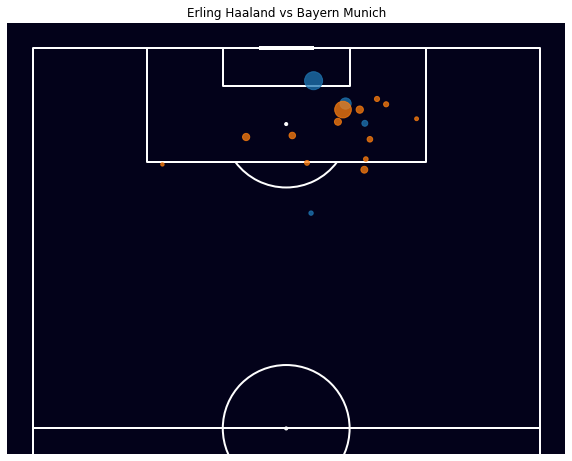

In [9]:
fig, axs = plt.subplots(figsize=(10, 10))

pitch = VerticalPitch(pitch_color='#03021a', line_color='white', half=True)
pitch.draw(ax=axs)

plt.scatter(goals[0], goals[1], goals[2], alpha=0.75)
plt.scatter(nongoals[0], nongoals[1], nongoals[2], alpha =0.75)
plt.title('Erling Haaland vs Bayern Munich')
plt.show()

In [10]:
conn.close

<function Connection.close>